## Import Required Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

## Get Data

In [4]:
url = 'https://drive.google.com/file/d/1X3EIx_2ZiZmDoPwaz-_Os5uy0STpU4e8/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path) 
data
df = pd.DataFrame(data)
df.head(3)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


# Jawablah pertanyaan di bawah ini dengan menggunakan visualisasi data sebagai alat untuk menyampaikan informasi :

## Pertanyaan 1:

Dari negara mana saja pengunjung hotel berasal? Perlihatkan 5 negara dengan jumlah  booking selesai terbanyak dan 5 negara dengan jumlah booking selesai paling sedikit  

In [5]:
#Read Data Country Origin (Pengunjung Hotel Negara Asal)
data_Country_Origin = df.groupby('country_origin').size().to_frame('count').sort_values('count', ascending = False).reset_index()
data_Country_Origin

,country_origin,count
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
...,...,...
172,MLI,1
173,MMR,1
174,MRT,1
175,SMR,1


In [6]:
# Step 1. Filter Checkout (Jumlah Booking Selesai)
data_checkout = df[ df['reservation_status']=='Check-Out' ]
data_checkout

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [7]:
# Step 2. Melakukan Agregasi Jumlah Booking Selesai tiap Negara
data_country_agg = data_checkout.groupby("country_origin").agg(count=pd.NamedAgg(column='country_origin',aggfunc='count'))
data_country_agg

,count
country_origin,
ABW,2
AGO,157
AIA,1
ALB,10
AND,2
...,...
VEN,14
VNM,6
ZAF,49


In [8]:
# Step 3. Melakukan Sorting
data_country_agg_sorted = data_country_agg.sort_values(['count'],ascending=False)
data_country_agg_sorted

,count
country_origin,
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069
...,...
SMR,1
MLI,1
SLE,1


In [9]:
# Step 4. Mengambil Top 5 Jumlah Booking Selesai Terbanyak
most_booked = data_country_agg_sorted.head(5).reset_index() 
most_booked 

,country_origin,count
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


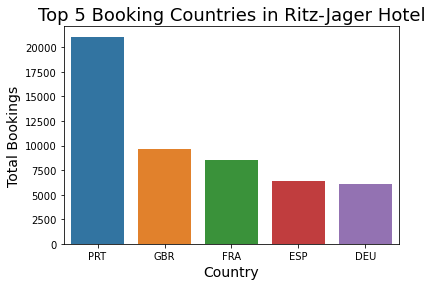

In [10]:
# Step 5. Membuat Visualisasi Data dengan 5 Negara Jumlah Booking Selesai Terbanyak
sns.barplot(x=most_booked['country_origin'],y=most_booked['count'])
plt.xlabel("Country", size= 14)
plt.ylabel("Total Bookings", size= 14)
plt.title("Top 5 Booking Countries in Ritz-Jager Hotel", size= 18)
plt.show()

In [11]:
# Step.6 Menyimpan Hasil Visualisasi Data 
plt.savefig('Top 5 Negara Jumlah Booking Selesai di Hotel Ritz-Jager')
plt.show()

<Figure size 432x288 with 0 Axes>

In [12]:
# Step 7. Mengambil Top 5 Jumlah Booking Selesai Paling Sedikit
least_booked = data_country_agg_sorted.tail(5).reset_index()
least_booked

,country_origin,count
0,SMR,1
1,MLI,1
2,SLE,1
3,MAC,1
4,PLW,1


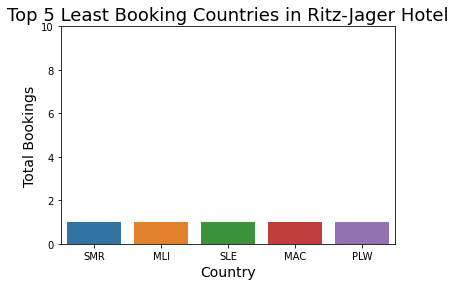

In [13]:
# Step 8. Membuat Visualisasi Data dengan 5 Negara Jumlah Booking Selesai Paling Sedikit
sns.barplot(x=least_booked['country_origin'], y=least_booked['count'])
plt.title('Top 5 Least Booking Countries in Ritz-Jager Hotel', size = 18)
plt.xlabel('Country', size=14)
plt.ylabel('Total Bookings', size = 14)
plt.ylim(0,10)
plt.show()

In [14]:
# Step.9 Menyimpan Hasil Visualisasi Data
plt.savefig('Top 5 Least Booking Countries in Ritz-Jager Hotel .pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

## Pertanyaan 2:

Perlihatkan Jumlah Booking berdasarkan Market Segment! 


In [15]:
# Step 1. Filter Direct
data_Direct = data[ data['market_segment']=='Direct' ]
data_Direct

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119358,City Hotel,0,135,2017,August,35,30,1,4,2,...,No Deposit,14.0,NaN,0,Transient,143.10,0,1,Check-Out,4/9/2017
119365,City Hotel,0,54,2017,August,35,27,3,5,1,...,No Deposit,14.0,NaN,0,Transient,266.75,0,1,Check-Out,4/9/2017
119368,City Hotel,0,261,2017,August,35,30,1,4,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,4/9/2017
119369,City Hotel,0,207,2017,August,34,25,3,7,2,...,No Deposit,14.0,NaN,0,Transient,96.25,0,2,Check-Out,4/9/2017


In [16]:
# Step 2. Melakukan Agregasi Jumlah Pengunjung per market segment
data_market_segment_agg = data_checkout.groupby('market_segment').agg(count=pd.NamedAgg(column='market_segment',aggfunc='count'))
data_market_segment_agg

,count
market_segment,
Aviation,185
Complementary,646
Corporate,4303
Direct,10672
Groups,7714
Offline TA/TO,15908
Online TA,35738


In [17]:
# Step 3. Melakukan sorting
data_market_segment_agg_sorted = data_market_segment_agg.sort_values(['count'],ascending=False)
data_market_segment_agg_sorted

,count
market_segment,
Online TA,35738
Offline TA/TO,15908
Direct,10672
Groups,7714
Corporate,4303
Complementary,646
Aviation,185


In [18]:
# Step 4. Misalnya mengambil top 5 Market Segment dengan Jumlah Booking Terbanyak
data_market_segment_top_5 = data_market_segment_agg_sorted.head().reset_index() 
data_market_segment_top_5

,market_segment,count
0,Online TA,35738
1,Offline TA/TO,15908
2,Direct,10672
3,Groups,7714
4,Corporate,4303


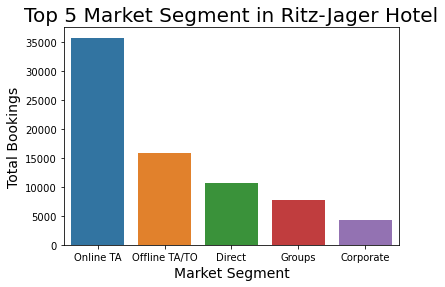

In [19]:
# Step 5 - Membuat Visualisasi Data
sns.barplot(x=data_market_segment_top_5['market_segment'], y=data_market_segment_top_5['count'])
plt.xlabel('Market Segment', size = 14)
plt.ylabel('Total Bookings', size=14)
plt.title('Top 5 Market Segment in Ritz-Jager Hotel', size=20)
plt.show()

In [20]:
# Step 6. Menyimpan Hasil Visualisasi Data
plt.savefig('Top 5 Market Segment.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

## Pertanyaan 3:

Berapa banyak jumlah pemesanan yang dibatalkan per tipe kamar hotel?


In [21]:
# Step 1. Filter Canceled
data_Canceled = data[ data['reservation_status']=='Canceled' ]
data_Canceled

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23/6/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11/5/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,City Hotel,1,13,2017,May,22,29,1,2,1,...,No Deposit,NaN,NaN,0,Transient,95.0,0,0,Canceled,17/5/2017
108000,City Hotel,1,13,2017,May,22,29,1,2,1,...,No Deposit,NaN,NaN,0,Transient,95.0,0,0,Canceled,17/5/2017
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,25/4/2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,5/6/2017


In [22]:
# Step 2. Melakukan agregasi Jumlah Pemesanan yang dibatalkan per reserved room type
data_reserved_cancelled_room = data_Canceled.groupby("reserved_room_type").agg(count=pd.NamedAgg(column='reserved_room_type',aggfunc='count'))
data_reserved_cancelled_room

,count
reserved_room_type,
A,32756
B,353
C,300
D,5914
E,1844
F,843
G,754
H,239
L,2


In [25]:
# Step 3. Melakukan Sorting
data_reserved_cancelled_room_sorted = data_reserved_cancelled_room.sort_values(['count'],ascending=False)
data_reserved_cancelled_room_sorted

,count
reserved_room_type,
A,32756
D,5914
E,1844
F,843
G,754
B,353
C,300
H,239
P,12


In [27]:
# Step 4. Misalnya Mengambil Top 5 Pemesanan Terbanyak yang dibatalkan tiap Tipe Kamar
data_reserved_cancelled_room_top_5 = data_reserved_cancelled_room_sorted.head().reset_index() 
data_reserved_cancelled_room_top_5

,reserved_room_type,count
0,A,32756
1,D,5914
2,E,1844
3,F,843
4,G,754


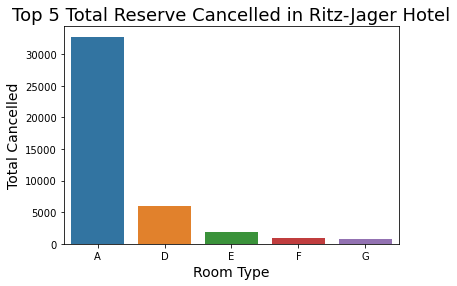

In [28]:
# step 5. Membuat Visualisasi Data
sns.barplot(x= data_reserved_cancelled_room_top_5['reserved_room_type'], y= data_reserved_cancelled_room_top_5['count'])
plt.xlabel('Room Type', size= 14)
plt.ylabel('Total Cancelled', size= 14)
plt.title('Top 5 Total Reserve Cancelled in Ritz-Jager Hotel', size= 18)
plt.show()

In [40]:
#Step 6. Menyimpan Hasil Visualisasi Data
plt.savefig('Top 5 Total Reserve Cancelled in Ritz-Jager Hotel.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

# Pertanyaan 4:
 
Pada Bulan apa terjadi jumlah pembatalan booking tertinggi? 

In [30]:
# Step 1. Melakukan Agregasi Jumlah Booking yang dibatalkan per bulan
df['reservation_status_month'] = pd.to_datetime(df['reservation_status_date'], format= '%d/%m/%Y').dt.strftime('%B')
canceled_booked=df.groupby(['reservation_status_month','reservation_status'])['reservation_status'].size().to_frame('count').reset_index()
canceled_booked=canceled_booked[canceled_booked['reservation_status']=='Canceled']
canceled_booked

,reservation_status_month,reservation_status,count
0,April,Canceled,3393
3,August,Canceled,2596
6,December,Canceled,3445
9,February,Canceled,4129
12,January,Canceled,5986
15,July,Canceled,4274
18,June,Canceled,2828
21,March,Canceled,3697
24,May,Canceled,3006
27,November,Canceled,2982


In [31]:
# Step 2. Melakukan Sorting 
data_cancelled_booked = canceled_booked.sort_values(['count'],ascending=False)
data_cancelled_booked

,reservation_status_month,reservation_status,count
12,January,Canceled,5986
15,July,Canceled,4274
9,February,Canceled,4129
30,October,Canceled,4072
21,March,Canceled,3697
6,December,Canceled,3445
0,April,Canceled,3393
24,May,Canceled,3006
27,November,Canceled,2982
18,June,Canceled,2828


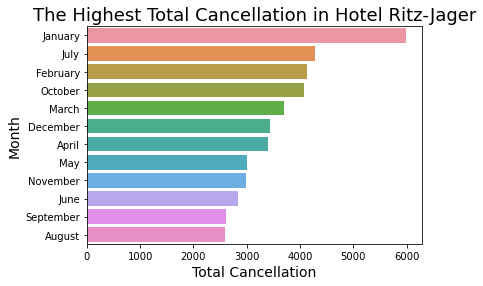

In [41]:
#Step 3. Membuat Visualisasi Data
sns.barplot(x= data_cancelled_booked['count'], y= data_cancelled_booked['reservation_status_month'])
plt.xlabel('Total Cancellations', size= 14)
plt.ylabel('Month', size= 14)
plt.title('The Highest Total Cancellations in Hotel Ritz-Jager', size= 18)
plt.show()

Jumlah Pembatalan Booking tertinggi adalah terjadi di bulan Januari sebanyak 5986 kali.

In [42]:
#Step 4. Menyimpan Hasil Visualisasi Data
plt.savefig('The Highest Total Cancellation in Hotel Ritz-Jager.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>